<a name='top'></a>Contents
===
- [Introduction](#intro)

- [Libraries](#libraries)

- [Functions](#functions)

- [Settings](#settings)

- [Dataset](#dataset)
      
- [Exploratory data analysis](#exploratory)
    - [Check dataset](#exploratory_check_data)
    - [Numerical and Categorical data features](#exploratory_features)
    - [Describe Numerical Data](#exploratory_describe_numerical)
    - [Describe Categorical Data](#exploratory_describe_categorical)
    - [Distribution of Target Variable](#distribution_target)
    
    







    - [Open References url dataset](#open_url)
    - [Merge References url and Top 50 references](#merge_url_top50)
    - [Customize References url dataset](#customize_url)
            - [Open BW dataset](#open_bw)
        - [Customize BW dataset](#customize_bw)
    - [Adwords](#adwords)
        - [Open Adwords dataset](#open_ads)
        - [Customize Ads dataset](#customize_ads)
    - [Merge BW and Adwords data](#merge_bw_ads)
    - [Select Top References](#top_50)

- [Save dataframe](#save_data)

------------------------------------------------------------------------------------------------------
<a name='intro'></a>
# Introduction

EXPLICAR TODO Y PONER FOTO

# RELLENAR!!

PASOS CUBIERTOS
    * DATASET
    * EXPLORATORY DATA ANALYSIS
    * DATA WRANGLING
    * ALGORITHMS

-----------------------------------------------------------------------------------
<a name='libraries'></a>
# Libraries

First of all, it is necessary to import the required libraries to develop all the steps correctly of this notebook.

In [2]:
#import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from matplotlib.ticker import PercentFormatter
#from datetime import datetime
%matplotlib inline
sns.set()


#import filter warnings
import warnings
warnings.filterwarnings('ignore')


#display a maximum of 500 columns and rows
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',200)

#set directory of work
path = '/home/miguel/my_project_python/my_project_env/tfm/shopping'
os.chdir(path)

# IMPORTAR LIBRERIAS DE SKLEARN!!!

-----------------------------------------------------------------------------------------------
<a name='functions'></a>
# Functions
In this chapter is run the functions used in this notebook.

# ¿NECESARIO?

In [18]:
def columns_nonumerical(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print('\nColumn Name:', col,)
            print(df[col].value_counts())

# DATASET

First of all, I import the required libraries to develop our study along this notebook

In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

-----------------------------------------------------------------------------------------------
<a name='settings'></a>
# Settings

RELLENAR

Here one can choose settings for optimal performance and runtime.
For example, nr_cv sets the number of cross validations used in GridsearchCV, and
min_val_corr is the minimum value for the correlation coefficient to the target (only features with larger correlation will be used).

In [11]:
# set number of cross validations
nr_cv = 5

In [ ]:
VER SI UTILIZAR

# switch for using log values for SalePrice and features     
use_logvals = 1    
# target used for correlation 
target = 'SalePrice_Log'
    
# only columns with correlation above this threshold value  
# are used for the ML Regressors in Part 3
min_val_corr = 0.4    
    
# switch for dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1

-----------------------------------------------------------------------------------------------
<a name='dataset'></a>
# Dataset

RELLENAR

In [6]:
#open the dataset of study
df = pd.read_csv('./data/final/data_final_ROAS.csv')

Check the data

In [9]:
#DEBERIAMOS HACERLO EN EL OTRO DATASET...
df['Cat_Price'] = df['Cat_Price'].apply(str)

### Some useful functions

-----------------------------------------------------------------------
<a name='exploratory'></a>
# Exploratory data analysis

RELLENAR


In [ ]:
<a name='exploratory_check_data'></a>
## Check dataset

RELLENAR

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

<a name='exploratory_features'></a>
## Numerical and Categorical data features

RELLENAR


In [52]:
#number of numerical columns features
numerical_columns = df.dtypes[df.dtypes != 'object'].index
print('Number of NUMERICAL COLUMNS: {} '.format(len(numerical_columns)))

#number of categorical columns features
categorical_columns = df.dtypes[df.dtypes == 'object'].index
print('Number of CATEGORICAL COLUMNS: {} '.format(len(categorical_columns)))

Number of NUMERICAL COLUMNS: 64 
Number of CATEGORICAL COLUMNS: 3 


In [57]:
#names of numerical and categorical columns
print('Numerical columns: {} '.format(df[numerical_columns].columns))
print('-'*228)
print('Categorical columns: {} '.format(df[categorical_columns].columns))

Numerical columns: Index(['Unnamed: 0', 'CPC_medio', 'CPC_medio_1w', 'CPC_medio_2w',
       'CPC_medio_3w', 'CPC_medio_4w', 'Impressions', 'Impressions_1w',
       'Impressions_2w', 'Impressions_3w', 'Impressions_4w', 'Clics',
       'Clics_1w', 'Clics_2w', 'Clics_3w', 'Clics_4w', 'CTR', 'CTR_1w',
       'CTR_2w', 'CTR_3w', 'CTR_4w', 'Page_Views', 'Page_Views_1w',
       'Page_Views_2w', 'Page_Views_3w', 'Page_Views_4w', 'Cost', 'Cost_1w',
       'Cost_2w', 'Cost_3w', 'Cost_4w', 'Conversions', 'Conversions_1w',
       'Conversions_2w', 'Conversions_3w', 'Conversions_4w', 'All_Conversions',
       'All_Conversions_1w', 'All_Conversions_2w', 'All_Conversions_3w',
       'All_Conversions_4w', 'Ads_Income', 'Ads_Income_1w', 'Ads_Income_2w',
       'Ads_Income_3w', 'Ads_Income_4w', 'Ads_Income_All', 'Ads_Income_All_1w',
       'Ads_Income_All_2w', 'Ads_Income_All_3w', 'Ads_Income_All_4w',
       'Net_Incomes', 'Net_Incomes_1w', 'Net_Incomes_2w', 'Net_Incomes_3w',
       'Net_Incomes_4w', 'U

<a name='exploratory_describe_numerical'></a>
## Describe Numerical Data

RELLENAR


In [12]:
df.describe()

,Unnamed: 0,CPC_medio,CPC_medio_1w,CPC_medio_2w,CPC_medio_3w,CPC_medio_4w,Impressions,Impressions_1w,Impressions_2w,Impressions_3w,Impressions_4w,Clics,Clics_1w,Clics_2w,Clics_3w,Clics_4w,CTR,CTR_1w,CTR_2w,CTR_3w,CTR_4w,Page_Views,Page_Views_1w,Page_Views_2w,Page_Views_3w,Page_Views_4w,Cost,Cost_1w,Cost_2w,Cost_3w,Cost_4w,Conversions,Conversions_1w,Conversions_2w,Conversions_3w,Conversions_4w,All_Conversions,All_Conversions_1w,All_Conversions_2w,All_Conversions_3w,All_Conversions_4w,Ads_Income,Ads_Income_1w,Ads_Income_2w,Ads_Income_3w,Ads_Income_4w,Ads_Income_All,Ads_Income_All_1w,Ads_Income_All_2w,Ads_Income_All_3w,Ads_Income_All_4w,Net_Incomes,Net_Incomes_1w,Net_Incomes_2w,Net_Incomes_3w,Net_Incomes_4w,Units_sold,Units_sold_1w,Units_sold_2w,Units_sold_3w,Units_sold_4w,ROAS_Ads,ROAS
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.00000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.00,1151.00,1151.00,1151.00,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,82.423979,0.283649,0.265769,0.261842,0.257324,0.253015,2297.152911,2032.932580,1909.325447,1834.019322,1751.010487,24.49609,20.520391,18.987541,18.232076,17.311477,0.010970,0.01,0.01,0.01,0.01,31.251955,24.834370,22.979791,22.027932,21.370990,6.993649,5.677767,5.241295,5.045821,4.806768,0.199201,0.132919,0.126177,0.127046,0.112181,0.605282,0.418410,0.403301,0.430096,0.395213,31.336186,15.415039,13.715856,12.652754,11.064301,63.594214,30.356820,26.031599,22.812615,19.441729,132.877350,51.407533,42.431581,39.627394,35.165187,1.572546,0.609010,0.502911,0.467524,0.414553,5.002719,23.093842
std,47.135467,0.048944,0.036832,0.040149,0.049860,0.059406,1163.261063,969.488815,800.885794,651.424658,526.959481,13.08327,10.221842,8.172737,6.840578,5.856589,0.002598,0.00,0.00,0.00,0.00,29.982617,21.572119,19.800382,19.141267,18.752208,4.195847,3.015377,2.363073,2.029996,1.792244,0.391041,0.152812,0.114781,0.112068,0.102869,0.851451,0.349808,0.298843,0.285569,0.290539,89.108051,20.123086,12.536982,10.780833,9.644938,174.951747,38.964166,23.893539,19.581494,17.002388,82.180009,23.736388,13.164726,14.047659,12.785554,0.958120,0.277206,0.158514,0.165923,0.151826,12.910482,16.167490
min,5.000000,0.220000,0.160000,0.150000,0.110000,0.080000,723.000000,752.860000,767.360000,866.480000,927.640000,10.00000,6.710000,7.000000,7.950000,8.250000,0.006463,0.01,0.01,0.01,0.01,9.000000,1.290000,0.640000,0.430000,0.640000,2.570000,1.930000,1.870000,2.020000,2.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.090000,0.060000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.930000,11.780000,5.890000,3.930000,2.950000,1.000000,0.140000,0.070000,0.050000,0.040000,0.000000,6.805281
25%,41.000000,0.240000,0.260000,0.250000,0.250000,0.230000,1364.000000,1229.000000,1203.000000,1172.880000,1172.880000,15.00000,11.860000,11.070000,10.880000,10.880000,0.009247,0.01,0.01,0.01,0.01,9.000000,10.570000,10.000000,9.670000,9.185000,4.440000,2.890000,2.710000,2.610000,2.610000,0.000000,0.000000,0.040000,0.030000,0.020000,0.000000,0.150000,0.210000,0.240000,0.220000,0.000000,0.000000,7.360000,4.910000,3.680000,0.000000,4.130000,10.940000,11.050000,8.390000,82.480000,35.350000,36.660000,33.610000,29.310000,1.000000,0.430000,0.430000,0.380000,0.320000,0.000000,11.666195
50%,100.000000,0.270000,0.280000,0.270000,0.270000,0.270000,1850.000000,1736.140000,1746.860000,1805.190000,1846.210000,

<a name='exploratory_describe_categorical'></a>
## Describe Categorical Data

RELLENAR


In [17]:
columns(df)


Column Name: CatN1
muebles    1151
Name: CatN1, dtype: int64

Column Name: CatN2
estanterías y librerías    1151
Name: CatN2, dtype: int64

Column Name: Cat_Price
100.0    645
150.0    506
Name: Cat_Price, dtype: int64


<a name='distribution_target'></a>
## Distribution of Target Variable

RELLENAR

Nuestro target es ROAS (si cogemos el otro debemos cambiarlo)

In [29]:
y = df["ROAS"]

In [30]:
y.describe()

count    1151.000000
mean       23.093842
std        16.167490
min         6.805281
25%        11.666195
50%        19.006912
75%        29.660194
max        80.751101
Name: ROAS, dtype: float64

In [31]:
y.value_counts()

23.299435    41
22.410758    41
24.190616    40
10.348808    40
7.580882     39
13.897220    38
6.805281     38
80.751101    37
7.229623     36
32.345098    35
9.255344     34
23.202532    34
35.630670    34
14.781362    34
15.621212    33
9.573710     33
18.167401    33
7.235840     32
22.408313    32
38.508403    32
13.979661    31
25.906542    31
29.660194    30
35.661479    30
60.888112    30
11.666168    29
21.473965    28
55.729730    28
11.666195    28
14.572438    28
16.730223    26
13.418741    26
30.962838    24
30.272908    24
19.006912    22
25.213205    20
Name: ROAS, dtype: int64

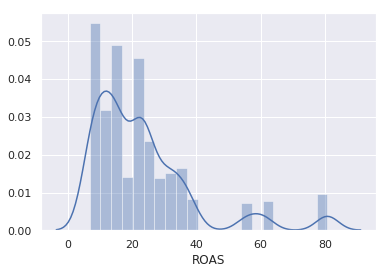

In [32]:
sns.distplot(y);

In [ ]:
# HACER SWEKNESS Y KURTOSIS PARA EXPLICAR QUE HA PASADO PARA HACER LOG

sns.distplot(df_train['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

In [34]:
df["ROAS_log"] = np.log(y)

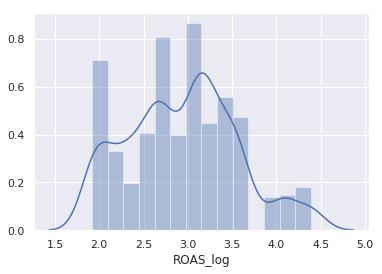

In [35]:
sns.distplot(df["ROAS_log"]);

In [ ]:
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])

sns.distplot(df_train['SalePrice_Log']);
# skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice_Log'].skew())
print("Kurtosis: %f" % df_train['SalePrice_Log'].kurt())
# dropping old column
df_train.drop('SalePrice', axis= 1, inplace=True)

------

EXPLICAR LO DE SWEKED EN LA GRÁFICA ANTERIOR

-----


# TARGET Distribution by Different Categorical Variables

------------------
SI NO HICIESEMOS ONE HOT ENCODING ANTES PODRÍAMOS HACER AQUI LA TRANSFORMACION

------------------

In [28]:
print(df[numerical_feats].columns)
print("*"*100)
print(df[categorical_feats].columns)

Index(['CatN1_baño', 'CatN1_cocina_y_comedor', 'CatN1_decoración_de_navidad',
       'CatN1_decoración_para_tu_casa', 'CatN1_jardín_y_terraza',
       'CatN1_lámparas_e_iluminación', 'CatN1_muebles',
       'CatN1_organización_y_almacenamiento', 'CatN1_playa_y_camping',
       'CatN1_textil_hogar', 'CatN2_alfombras_de_bambú',
       'CatN2_armarios_de_baño', 'CatN2_banquetas_y_bancos',
       'CatN2_belenes_y_portales_de_navidad', 'CatN2_biombos_separadores',
       'CatN2_carritos_verduleros_y_de_cocina',
       'CatN2_cenadores_y_gazebos_plegables',
       'CatN2_consolas,_recibidores_y_tocadores', 'CatN2_cómodas',
       'CatN2_espejos_de_pared', 'CatN2_espejos_de_pie_y_vestidores',
       'CatN2_estanterías_para_baño', 'CatN2_estanterías_y_librerías',
       'CatN2_faroles,_portavelas_y_candelabros', 'CatN2_lámparas_de_mesa',
       'CatN2_lámparas_de_mesita_de_noche',
       'CatN2_mesas_de_centro_y_auxiliares', 'CatN2_mesitas_de_noche',
       'CatN2_percheros', 'CatN2_sillas',
 

In [29]:
df[numerical_feats].head()

,CatN1_baño,CatN1_cocina_y_comedor,CatN1_decoración_de_navidad,CatN1_decoración_para_tu_casa,CatN1_jardín_y_terraza,CatN1_lámparas_e_iluminación,CatN1_muebles,CatN1_organización_y_almacenamiento,CatN1_playa_y_camping,CatN1_textil_hogar,CatN2_alfombras_de_bambú,CatN2_armarios_de_baño,CatN2_banquetas_y_bancos,CatN2_belenes_y_portales_de_navidad,CatN2_biombos_separadores,CatN2_carritos_verduleros_y_de_cocina,CatN2_cenadores_y_gazebos_plegables,"CatN2_consolas,_recibidores_y_tocadores",CatN2_cómodas,CatN2_espejos_de_pared,CatN2_espejos_de_pie_y_vestidores,CatN2_estanterías_para_baño,CatN2_estanterías_y_librerías,"CatN2_faroles,_portavelas_y_candelabros",CatN2_lámparas_de_mesa,CatN2_lámparas_de_mesita_de_noche,CatN2_mesas_de_centro_y_auxiliares,CatN2_mesitas_de_noche,CatN2_percheros,CatN2_sillas,CatN2_sillas_y_sillones_de_jardín_y_terraza,Cat_Price,Page_Views,Impressions,Clics,CPC_medio,Conversions,Ads_Income,Units_Sold,Net_Incomes,ROAS,ROAS_log
20,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0,9.0,521.0,5.0,0.43,1.0,53.90,1.0,44.55,20.529954,3.021885
42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0,9.0,560.0,5.0,0.58,1.0,83.22,1.0,44.55,15.256849,2.725029
53,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,50.0,47.0,3638.0,23.0,0.50,0.0,0.00,1.0,40.08,3.506562,1.254636
65,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0,9.0,255.0,2.0,0.85,0.0,0.00,3.0,133.64,78.611765,4.364521
70,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0,37.0,413.0,3.0,0.56,1.0,53.90,1.0,44.55,26.360947,3.271884


In [30]:
df[categorical_feats].head()

""
20
42
53
65
70


#### Skewness and kurtosis

Debemos establecer un umbral de skewness y kurtosis (buscar info)

In [31]:
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[col].kurt())  
         )

CatN1_baño      Skewness: 05.31     Kurtosis: 026.24
CatN1_cocina_y_comedor Skewness: 07.14     Kurtosis: 049.13
CatN1_decoración_de_navidad Skewness: 03.40     Kurtosis: 009.55
CatN1_decoración_para_tu_casa Skewness: 00.99     Kurtosis: -01.03
CatN1_jardín_y_terraza Skewness: 09.33     Kurtosis: 085.21
CatN1_lámparas_e_iluminación Skewness: 05.09     Kurtosis: 024.01
CatN1_muebles   Skewness: 00.54     Kurtosis: -01.71
CatN1_organización_y_almacenamiento Skewness: 02.36     Kurtosis: 003.57
CatN1_playa_y_camping Skewness: 07.70     Kurtosis: 057.46
CatN1_textil_hogar Skewness: 04.10     Kurtosis: 014.84
CatN2_alfombras_de_bambú Skewness: 04.10     Kurtosis: 014.84
CatN2_armarios_de_baño Skewness: 07.41     Kurtosis: 053.00
CatN2_banquetas_y_bancos Skewness: 07.14     Kurtosis: 049.13
CatN2_belenes_y_portales_de_navidad Skewness: 03.40     Kurtosis: 009.55
CatN2_biombos_separadores Skewness: 07.41     Kurtosis: 053.00
CatN2_carritos_verduleros_y_de_cocina Skewness: 07.14     Kurtosis: 

### List of features with missing values

In [32]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
ROAS_log,0,0.0
CatN2_alfombras_de_bambú,0,0.0
CatN2_cómodas,0,0.0
"CatN2_consolas,_recibidores_y_tocadores",0,0.0
CatN2_cenadores_y_gazebos_plegables,0,0.0
CatN2_carritos_verduleros_y_de_cocina,0,0.0
CatN2_biombos_separadores,0,0.0
CatN2_belenes_y_portales_de_navidad,0,0.0
CatN2_banquetas_y_bancos,0,0.0
CatN2_armarios_de_baño,0,0.0


In [33]:
print('Missing values in the dataset: ',df.isnull().sum().sum())

Missing values in the dataset:  0


-------
UTILIZAR ESTA FUNCION TAMBIÉN EN EL DATASET: para comprobar cuantos nulos tengo

-------

### Target distribution by Cat_Price

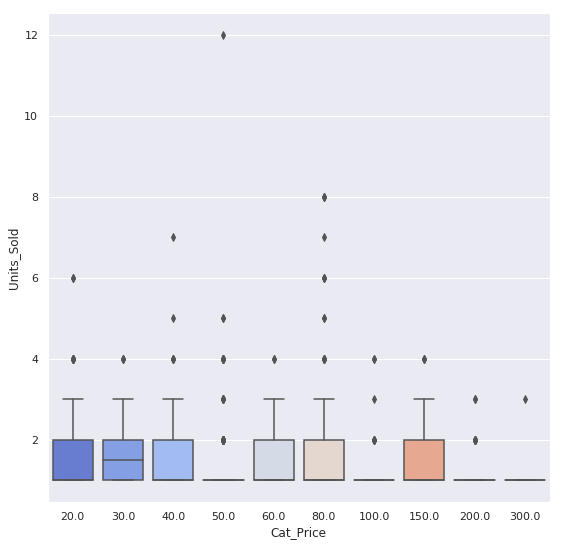

In [34]:
sns.boxplot(x="Cat_Price", y="Units_Sold", data=df, palette="coolwarm")

-----------

REVISAR


-----------

In [208]:
sns.kdeplot(df.loc[df["Cat_Price"] == 'U', 'ROAS'], label = '300', shade = True)
sns.kdeplot(df.loc[df["Cat_Price"] == 'R', 'ROAS'], label = '150', shade = True)
sns.kdeplot(df.loc[df["Cat_Price"] == 'R', 'ROAS'], label = '80', shade = True)
sns.kdeplot(df.loc[df["Cat_Price"] == 'R', 'ROAS'], label = '60', shade = True)
sns.kdeplot(df.loc[df["Cat_Price"] == 'R', 'ROAS'], label = '50', shade = True)
plt.xlabel('Grade'); plt.ylabel('Cat_Price'); plt.title('Density Plot of Final Grades by ilocation');

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


KeyError: 'ROAS'

-------------

QUIZAS SE PUEDE HACER PARA MAS CATEGORIAS

-------------

### Grade Percentile

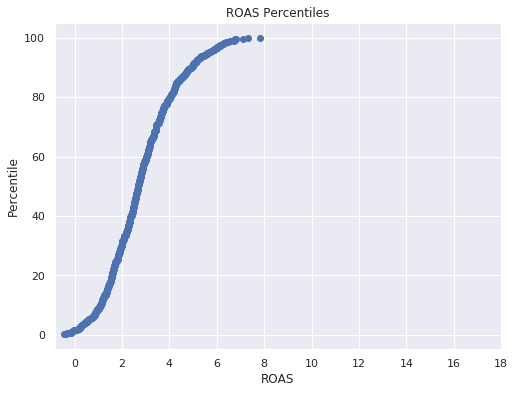

In [35]:
df['percentile'] = df['ROAS_log'].apply(lambda x: percentileofscore(df['ROAS_log'], x))


# Plot percentiles for grades
plt.figure(figsize = (8, 6))
plt.plot(df['ROAS_log'], df['percentile'], 'o')
plt.xticks(range(0, 20, 2), range(0, 20, 2))
plt.xlabel('ROAS'); plt.ylabel('Percentile'); plt.title('ROAS Percentiles');

-------

JUGAR CON XTICKS 

QUIZAS PODEMOS HACER PARETO COMO HICIMOS PARA IXIA

ademas debemos hacer este gráfico despues de los outliers, porque sino revienta

CAMBIA CODIGO ;)

-------

In [36]:
print('Minimum Score needed for 50th percentile:', round(np.min(df.loc[df['percentile'] > 50, 'ROAS']),2))
print('Minimum Score needed for 90th percentile:', round(np.min(df.loc[df['percentile'] > 90, 'ROAS']),2))

Minimum Score needed for 50th percentile: 14.63
Minimum Score needed for 90th percentile: 139.86


In [37]:
df.shape

(807, 43)

### Plots of relation to target for all numerical features

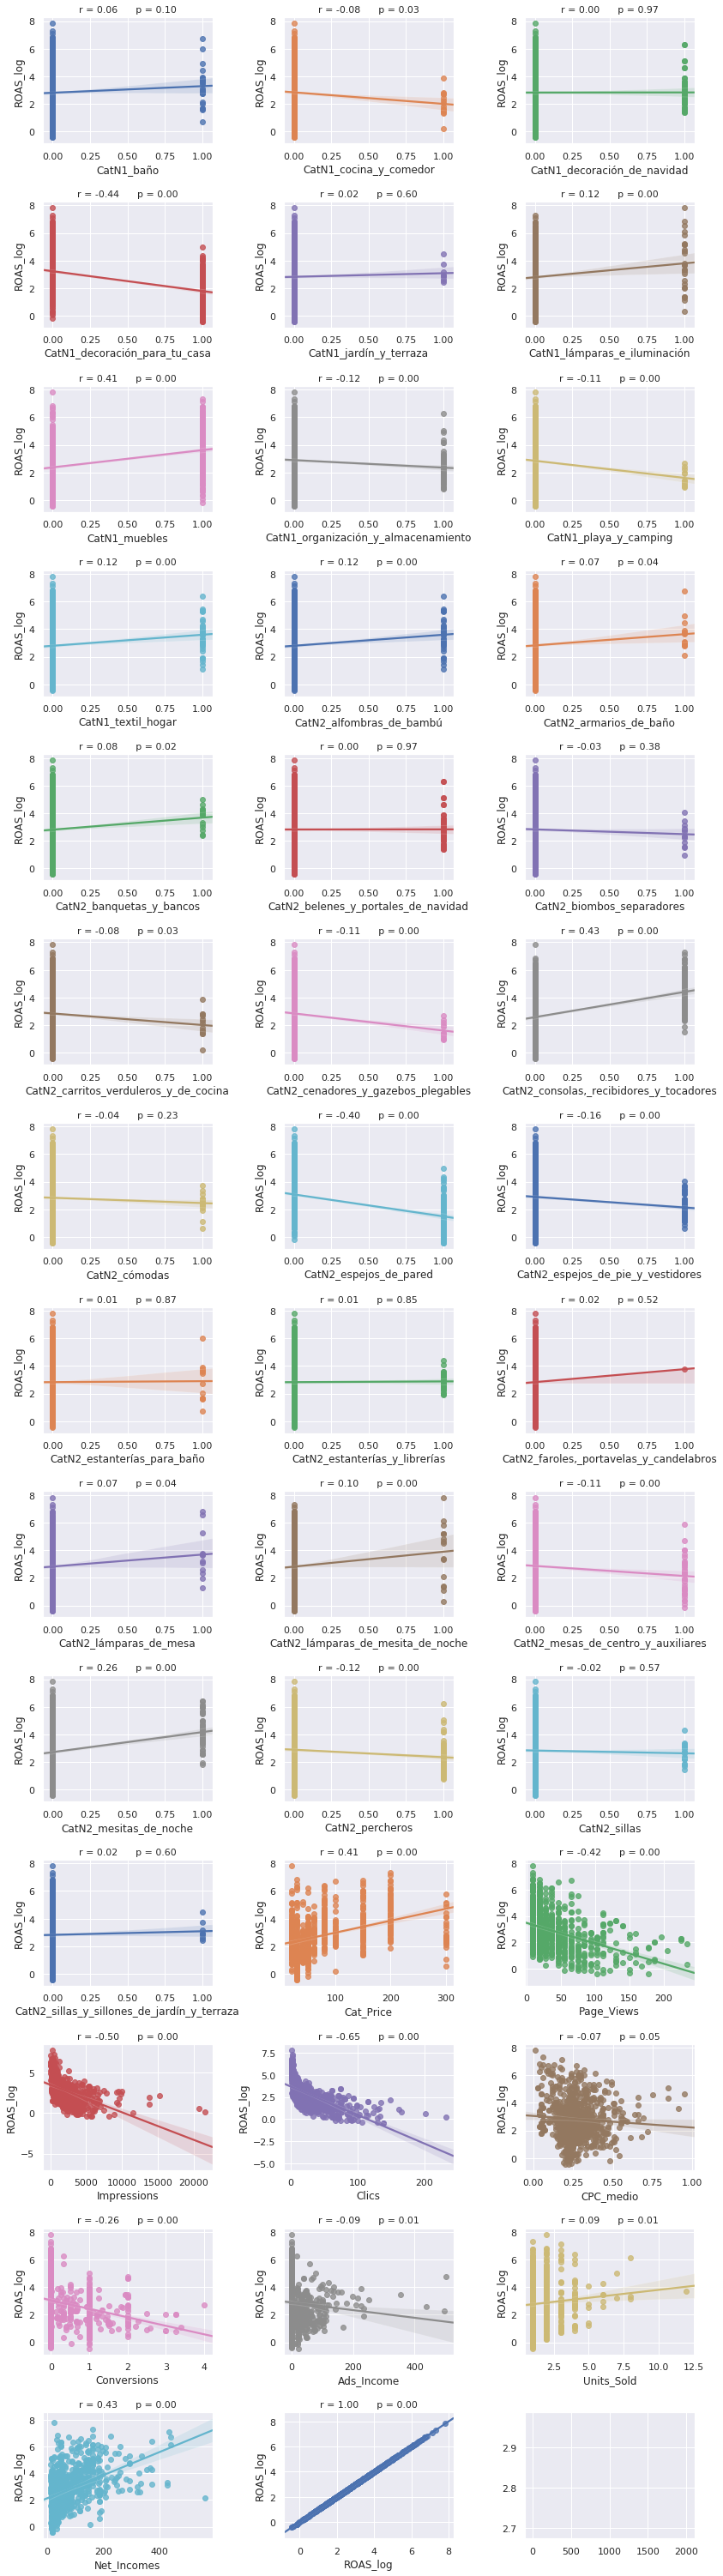

In [38]:
nr_rows = 14
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['ROAS']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df[li_plot_num_feats[i]], df["ROAS_log"], ax = axs[r][c])
            stp = stats.pearsonr(df[li_plot_num_feats[i]], df["ROAS_log"])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

----------

PODEMOS CONCLUIR SOBRE ESTE GRÁFICO

ADEMAS, DEBEMOS HACER QUE SE VEA , NO TENER QUE DESLIZAR

--------

### Outliers

Outliers exists in our dataset because of variability of the data.

In [39]:
cat_corr = df[["Net_Incomes", "Units_Sold"]]

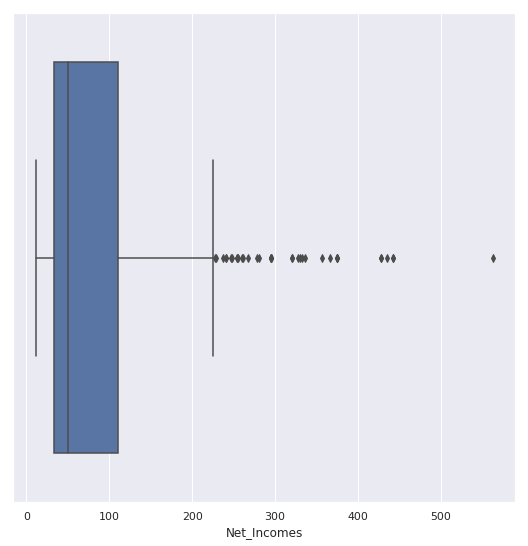

In [41]:
#sns.boxplot(data=df, palette='rainbow', orient='v')
sns.boxplot(x = df["Net_Incomes"])

#### Log de Units_Sold, CPC medio y Incomes

In [42]:
for df in [df]:
    df['Units_Sold_log'] = np.log(df['Units_Sold'])
    #df.drop('GrLivArea', inplace= True, axis = 1)
    df['Net_Incomes_log'] = np.log(df['Net_Incomes'])
    #df.drop('LotArea', inplace= True, axis = 1)
    df['CPC_medio_log'] = np.log(df['CPC_medio'])
    
    
numerical_feats = df.dtypes[df.dtypes != "object"].index

#### IQR

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CatN1_baño                                        0.000000
CatN1_cocina_y_comedor                            0.000000
CatN1_decoración_de_navidad                       0.000000
CatN1_decoración_para_tu_casa                     1.000000
CatN1_jardín_y_terraza                            0.000000
CatN1_lámparas_e_iluminación                      0.000000
CatN1_muebles                                     1.000000
CatN1_organización_y_almacenamiento               0.000000
CatN1_playa_y_camping                             0.000000
CatN1_textil_hogar                                0.000000
CatN2_alfombras_de_bambú                          0.000000
CatN2_armarios_de_baño                            0.000000
CatN2_banquetas_y_bancos                          0.000000
CatN2_belenes_y_portales_de_navidad               0.000000
CatN2_biombos_separadores                         0.000000
CatN2_carritos_verduleros_y_de_cocina             0.000000
CatN2_cenadores_y_gazebos_plegables               0.0000

In [44]:
Q1 = cat_corr.quantile(0.25)
Q3 = cat_corr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Net_Incomes    77.02
Units_Sold      1.00
dtype: float64


In [45]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [46]:
df_out.shape

(732, 46)

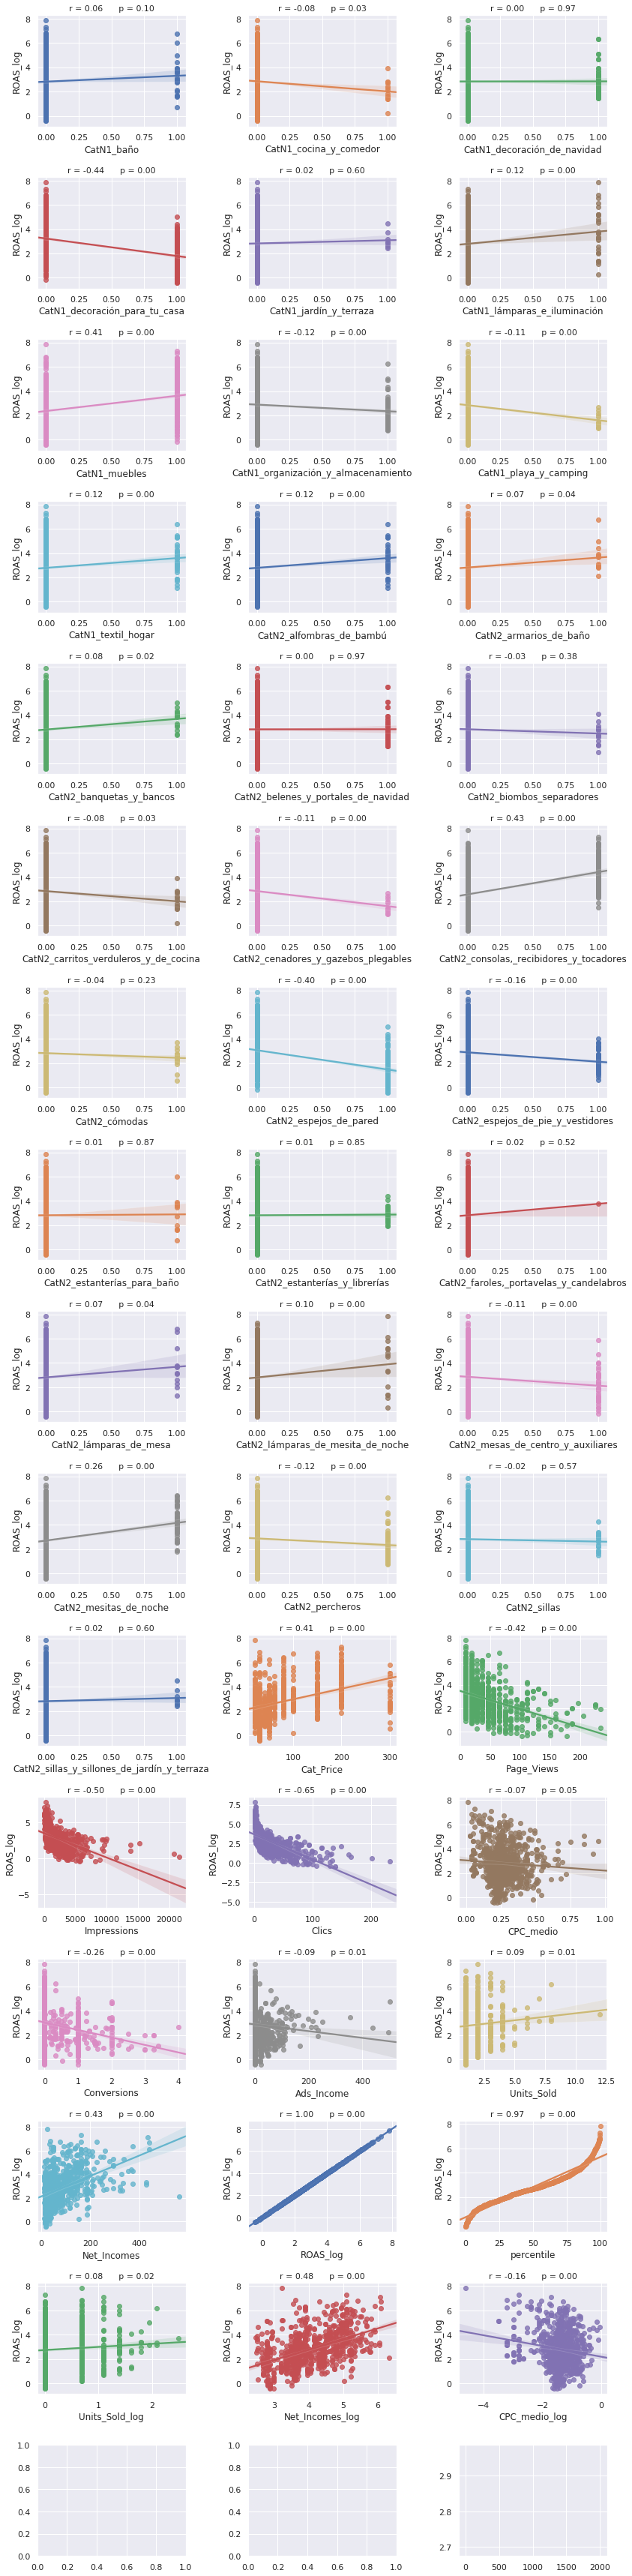

In [47]:
nr_rows = 16
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['ROAS']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df[li_plot_num_feats[i]], df["ROAS_log"], ax = axs[r][c])
            stp = stats.pearsonr(df[li_plot_num_feats[i]], df["ROAS_log"])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()

-------

Visto lo visto debemos hacer log para que se ajuste bien los datos


------

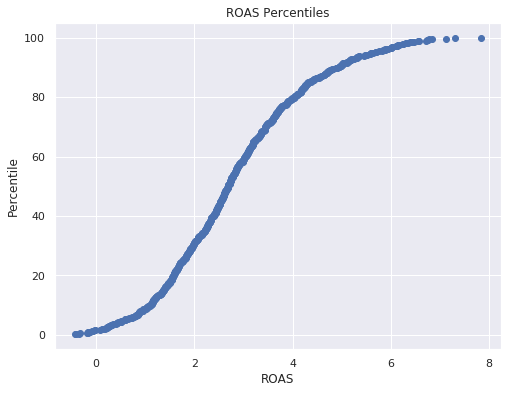

In [48]:
df['percentile'] = df['ROAS_log'].apply(lambda x: percentileofscore(df['ROAS_log'], x))


# Plot percentiles for grades
plt.figure(figsize = (8, 6))
plt.plot(df['ROAS_log'], df['percentile'], 'o')
plt.xticks(range(0, 10, 2), range(0, 20, 2))
plt.xlabel('ROAS'); plt.ylabel('Percentile'); plt.title('ROAS Percentiles');

### Correlation

In [49]:
# Correlations of numerical values
df.corr()['ROAS_log'].sort_values()

Clics                                         -0.646066
Impressions                                   -0.496826
CatN1_decoración_para_tu_casa                 -0.436929
Page_Views                                    -0.416929
CatN2_espejos_de_pared                        -0.396447
Conversions                                   -0.261824
CPC_medio_log                                 -0.162972
CatN2_espejos_de_pie_y_vestidores             -0.157685
CatN1_organización_y_almacenamiento           -0.120089
CatN2_percheros                               -0.120089
CatN2_mesas_de_centro_y_auxiliares            -0.106818
CatN1_playa_y_camping                         -0.106299
CatN2_cenadores_y_gazebos_plegables           -0.106299
Ads_Income                                    -0.090520
CatN2_carritos_verduleros_y_de_cocina         -0.076819
CatN1_cocina_y_comedor                        -0.076819
CPC_medio                                     -0.070585
CatN2_cómodas                                 -0

In [50]:
correlation_list = df.corr()['ROAS_log'].sort_values()

-------

QUEDA POR METER TODA LA RELACION DE CATEGORICAL FEATURES
## house-prices-eda

-------

In [51]:
nr_feats = len(correlation_list)
nr_feats

46

In [52]:
y_log = df["ROAS_log"]

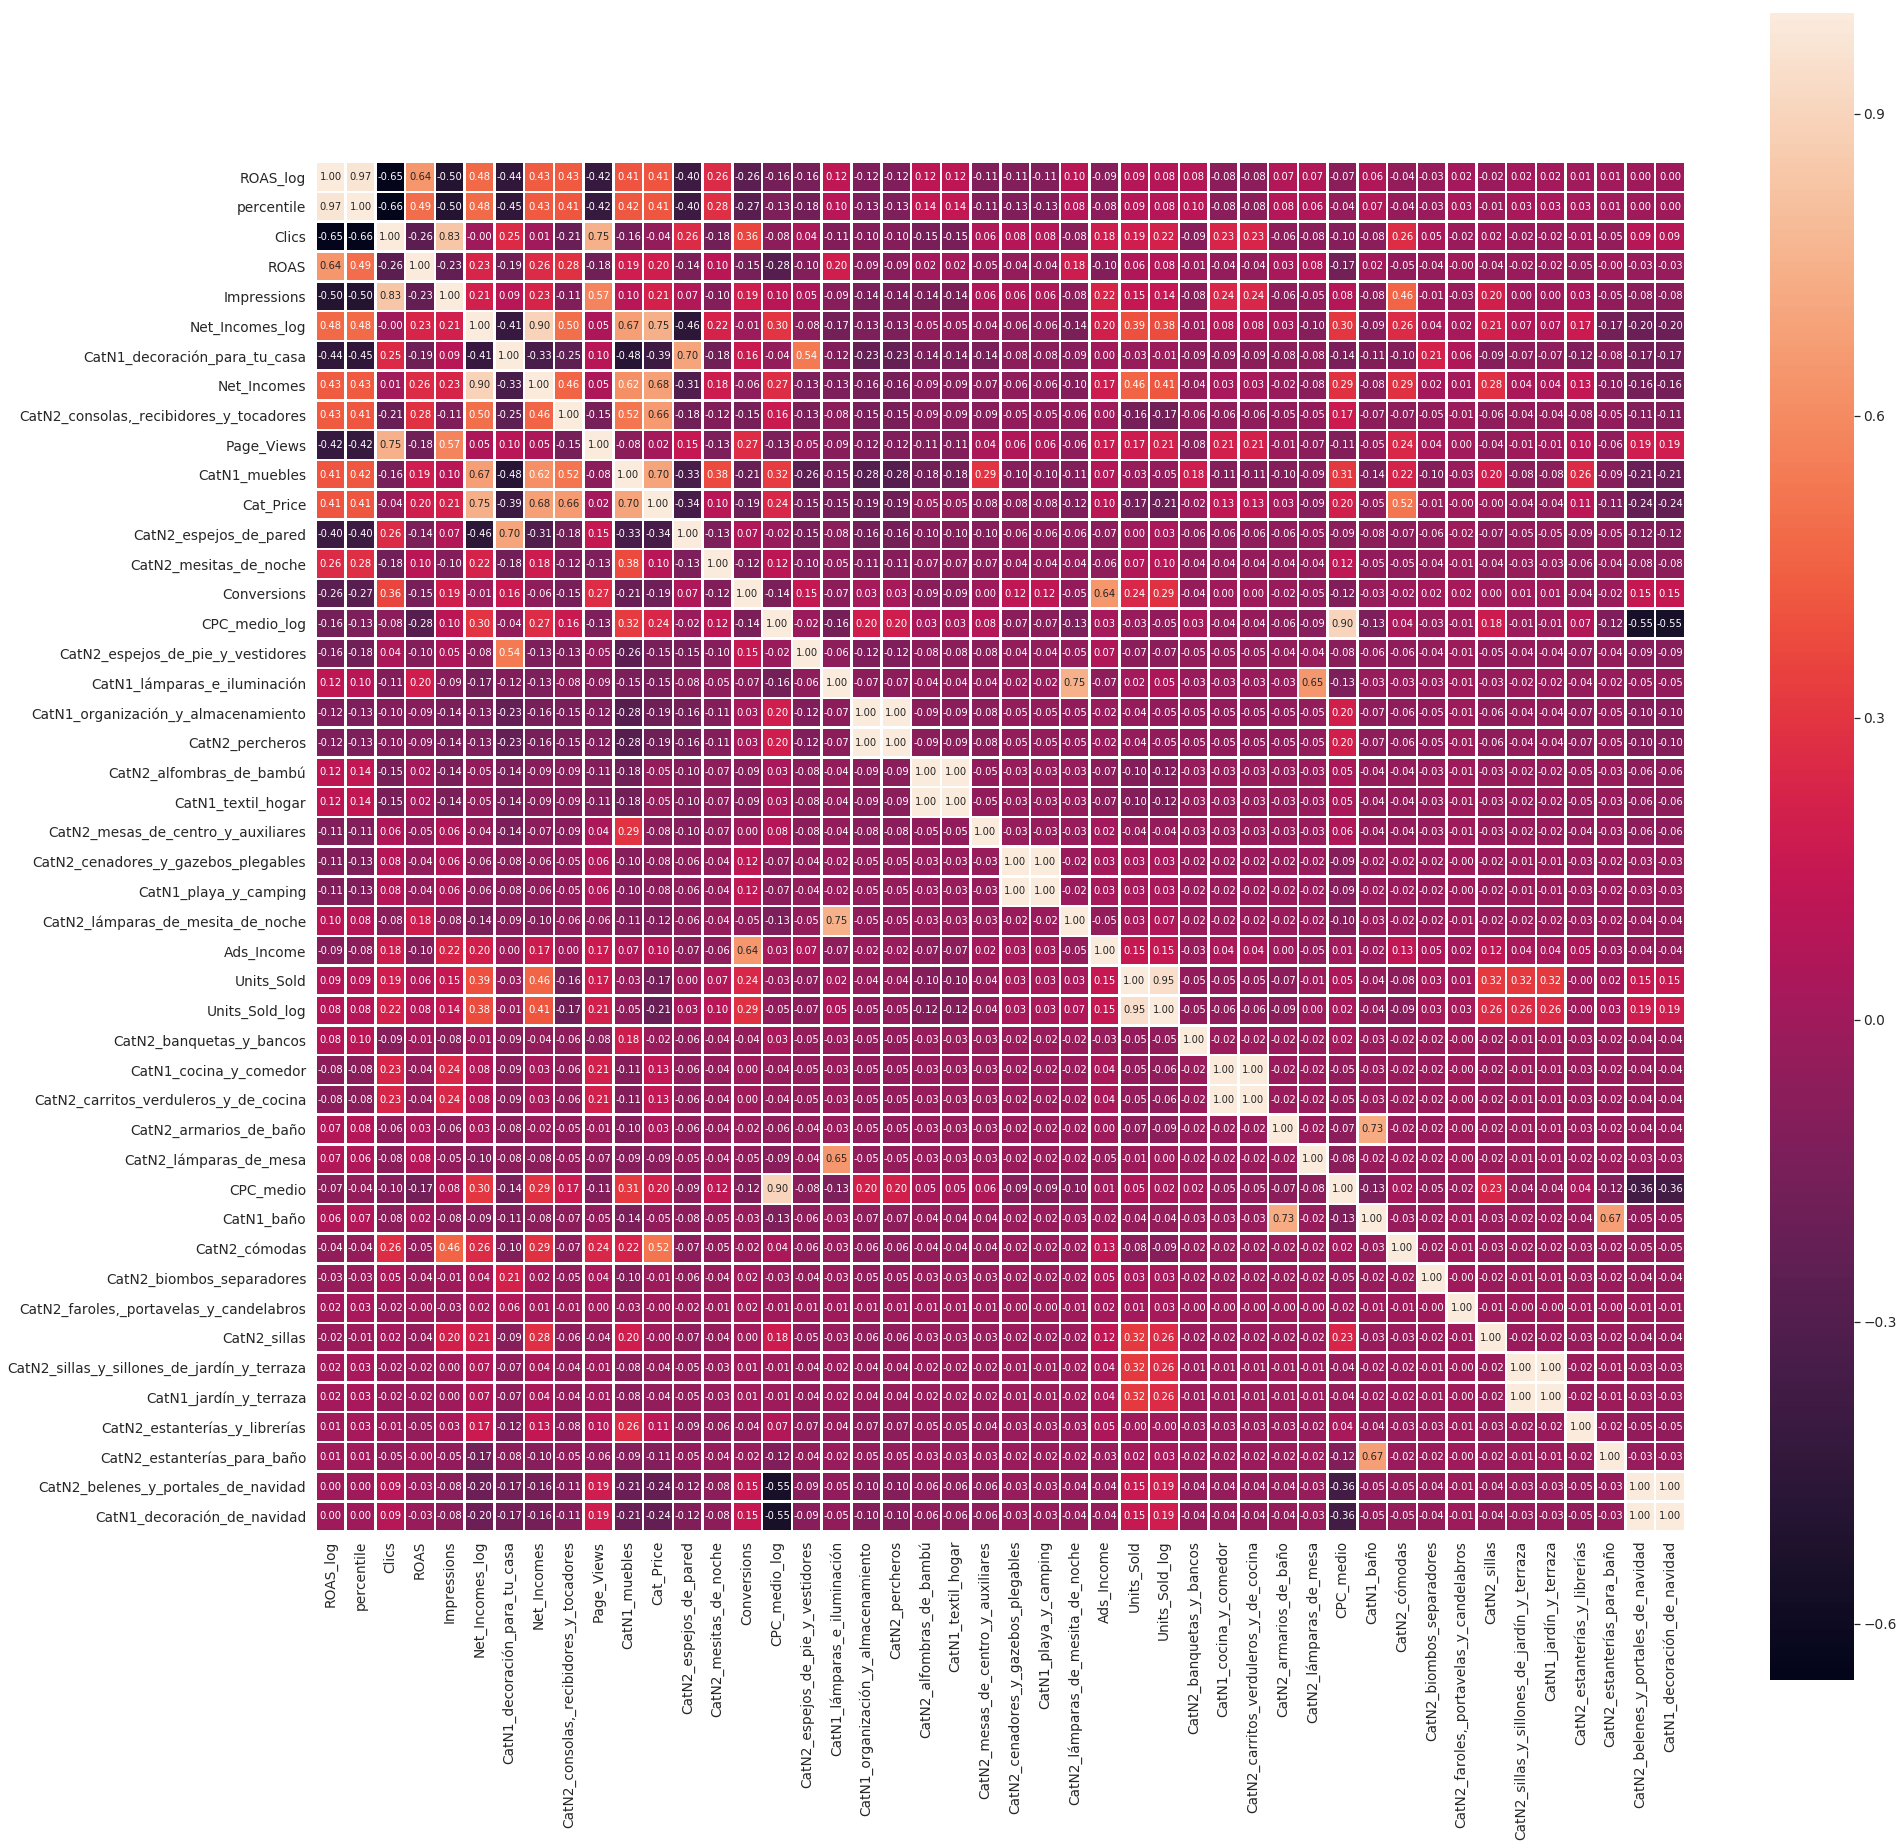

In [53]:
plot_corr_matrix(df, nr_feats, "ROAS_log")
#sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
#ESTO SERA MAS PEQUEÑO PORQUE NO TENDREMOS LAS VARIABLES CATEGORICAS

### Feature Selection

Why sould I apply feature selection to this dataset?
    * It enables the machine learning algorithm to train faster.
    * It reduces the complexity of a model and makes it easier to interpret.
    * It improves the accuracy of a model if the right subset is chosen.
    * It reduces overfitting.
    
    #meter fuente
    https://datascientistssite.wordpress.com/2017/08/21/univariate-selection-feature-in-python/

### UTILIZAR ESTE GRAFICO PARA LAS OPCIONES ELEGIDAS POR CORRELACION

sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

1. FEATURE
2. MULTICOLLINEARITY (hay archivo)
3. SCALAR: standardscaler y maxminscaler
4. CORRELACION DE NUEVO

In [54]:
df.columns

Index(['CatN1_baño', 'CatN1_cocina_y_comedor', 'CatN1_decoración_de_navidad',
       'CatN1_decoración_para_tu_casa', 'CatN1_jardín_y_terraza',
       'CatN1_lámparas_e_iluminación', 'CatN1_muebles',
       'CatN1_organización_y_almacenamiento', 'CatN1_playa_y_camping',
       'CatN1_textil_hogar', 'CatN2_alfombras_de_bambú',
       'CatN2_armarios_de_baño', 'CatN2_banquetas_y_bancos',
       'CatN2_belenes_y_portales_de_navidad', 'CatN2_biombos_separadores',
       'CatN2_carritos_verduleros_y_de_cocina',
       'CatN2_cenadores_y_gazebos_plegables',
       'CatN2_consolas,_recibidores_y_tocadores', 'CatN2_cómodas',
       'CatN2_espejos_de_pared', 'CatN2_espejos_de_pie_y_vestidores',
       'CatN2_estanterías_para_baño', 'CatN2_estanterías_y_librerías',
       'CatN2_faroles,_portavelas_y_candelabros', 'CatN2_lámparas_de_mesa',
       'CatN2_lámparas_de_mesita_de_noche',
       'CatN2_mesas_de_centro_y_auxiliares', 'CatN2_mesitas_de_noche',
       'CatN2_percheros', 'CatN2_sillas',
 

In [55]:
X = df[['CatN1_baño', 'CatN1_cocina_y_comedor', 'CatN1_decoración_de_navidad',
       'CatN1_decoración_para_tu_casa', 'CatN1_jardín_y_terraza',
       'CatN1_lámparas_e_iluminación', 'CatN1_muebles',
       'CatN1_organización_y_almacenamiento', 'CatN1_playa_y_camping',
       'CatN1_textil_hogar', 'CatN2_alfombras_de_bambú',
       'CatN2_armarios_de_baño', 'CatN2_banquetas_y_bancos',
       'CatN2_belenes_y_portales_de_navidad', 'CatN2_biombos_separadores',
       'CatN2_carritos_verduleros_y_de_cocina',
       'CatN2_cenadores_y_gazebos_plegables',
       'CatN2_consolas,_recibidores_y_tocadores', 'CatN2_cómodas',
       'CatN2_espejos_de_pared', 'CatN2_espejos_de_pie_y_vestidores',
       'CatN2_estanterías_para_baño', 'CatN2_estanterías_y_librerías',
       'CatN2_faroles,_portavelas_y_candelabros', 'CatN2_lámparas_de_mesa',
       'CatN2_lámparas_de_mesita_de_noche',
       'CatN2_mesas_de_centro_y_auxiliares', 'CatN2_mesitas_de_noche',
       'CatN2_percheros', 'CatN2_sillas',
       'CatN2_sillas_y_sillones_de_jardín_y_terraza', 'Cat_Price',
       'Page_Views', 'Impressions', 'Clics', 'CPC_medio', 'Conversions',
       'Ads_Income', 'Units_Sold', 'Net_Incomes', 'Units_Sold_log', 
        'Net_Incomes_log', 'CPC_medio_log']]
y = df.ROAS_log

In [56]:
feature_name = X.columns.tolist()

#### Pearson

In [57]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-10:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [58]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

10 selected features


#### Chi-2

In [357]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [342]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
X_norm = scaler_x.fit_transform(df)

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [354]:
df_new.shape

(2846, 47)

In [343]:
df_new = pd.DataFrame(X_norm)

In [351]:
df_new.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.142857,0.000000,0.009993,0.008245,0.145161,0.095890,0.069158,0.000000,0.020616,0.007165,0.768366,0.462107,0.000000,0.271701,0.555759,0.346960
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.142857,0.000000,0.052626,0.057713,0.612903,0.095890,0.106790,0.000000,0.020616,0.000997,0.233040,0.256042,0.000000,0.271701,0.884249,0.133498
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.142857,0.000000,0.063162,0.063649,0.645161,0.116438,0.134633,0.000000,0.020616,0.000825,0.178559,0.237581,0.000000,0.271701,0.896319,0.118095
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.142857,0.065292,0.069781,0.073048,0.677419,0.130137,0.146219,0.000000,0.020616,0.000673,0.136380,0.218109,0.000000,0.271701,0.907815,0.102782
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.142857,0.130584,0.105888,0.096628,0.774194,0.150685,0.157715,0.137349,0.129720,0.002503,0.508612,0.350113,0.474411,0.594716,0.939342,0.223326


In [355]:
df_new = df_new.rename(columns={"46": "ROAS_log"})

In [356]:
X_chi = df_new[[]]
y_chi = df_new.46
feature_name = X_chi.columns.tolist()

SyntaxError: invalid syntax (<ipython-input-356-b2aea8d6ce4c>, line 2)

#### Random Forest

In [69]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=25), threshold='7*median')
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False,
        threshold='7*median')

In [70]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

12 selected features


#### LGBMRegressor

In [86]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMRegressor

In [87]:
lgbc= LGBMRegressor(n_estimators=10, learning_rate=0.05, num_leaves=16, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=5)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1000*median')
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.2,
       importance_type='split', learning_rate=0.05, max_depth=-1,
       min_child_samples=20, min_child_weight=5, min_split_gain=0.01,
       n_estimators=10, n_jobs=-1, num_leaves=16, objective=None,
       random_state=None, reg_alpha=3, reg_lambda=1, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
        max_features=None, norm_order=1, prefit=False,
        threshold='1000*median')

In [88]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

43 selected features


#### Final Selection

In [89]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(50)

,Feature,Pearson,Random Forest,LightGBM,Total
1,Page_Views,True,True,True,3
2,Net_Incomes_log,True,True,True,3
3,Net_Incomes,True,True,True,3
4,Impressions,True,True,True,3
5,Clics,True,True,True,3
6,Cat_Price,True,True,True,3
7,CatN2_espejos_de_pared,True,True,True,3
8,CatN1_decoración_para_tu_casa,True,True,True,3
9,Units_Sold_log,False,True,True,2
10,Units_Sold,False,True,True,2


We select Top 10 columns

In [90]:
columns = feature_selection_df.Feature[0:10,]
columns

1                        Page_Views
2                   Net_Incomes_log
3                       Net_Incomes
4                       Impressions
5                             Clics
6                         Cat_Price
7            CatN2_espejos_de_pared
8     CatN1_decoración_para_tu_casa
9                    Units_Sold_log
10                       Units_Sold
Name: Feature, dtype: object

In [91]:
df_final = df[columns]

In [92]:
df_final.head()

,Page_Views,Net_Incomes_log,Net_Incomes,Impressions,Clics,Cat_Price,CatN2_espejos_de_pared,CatN1_decoración_para_tu_casa,Units_Sold_log,Units_Sold
20,9.0,3.796612,44.55,521.0,5.0,60.0,0,0,0.000000,1.0
42,9.0,3.796612,44.55,560.0,5.0,60.0,0,0,0.000000,1.0
53,47.0,3.690877,40.08,3638.0,23.0,50.0,0,0,0.000000,1.0
65,9.0,4.895150,133.64,255.0,2.0,60.0,0,0,1.098612,3.0
70,37.0,3.796612,44.55,413.0,3.0,60.0,0,0,0.000000,1.0


In [93]:
df_final.shape

(807, 10)

In [94]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 20 to 9123
Data columns (total 10 columns):
Page_Views                       807 non-null float64
Net_Incomes_log                  807 non-null float64
Net_Incomes                      807 non-null float64
Impressions                      807 non-null float64
Clics                            807 non-null float64
Cat_Price                        807 non-null float64
CatN2_espejos_de_pared           807 non-null int64
CatN1_decoración_para_tu_casa    807 non-null int64
Units_Sold_log                   807 non-null float64
Units_Sold                       807 non-null float64
dtypes: float64(8), int64(2)
memory usage: 109.4 KB


In [95]:
df_final["ROAS_log"] = y

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
df_final.corr()['ROAS_log'].sort_values()

Clics                           -0.646066
Impressions                     -0.496826
CatN1_decoración_para_tu_casa   -0.436929
Page_Views                      -0.416929
CatN2_espejos_de_pared          -0.396447
Units_Sold_log                   0.084279
Units_Sold                       0.086832
Cat_Price                        0.407855
Net_Incomes                      0.434404
Net_Incomes_log                  0.480255
ROAS_log                         1.000000
Name: ROAS_log, dtype: float64

#### Correlation final selection

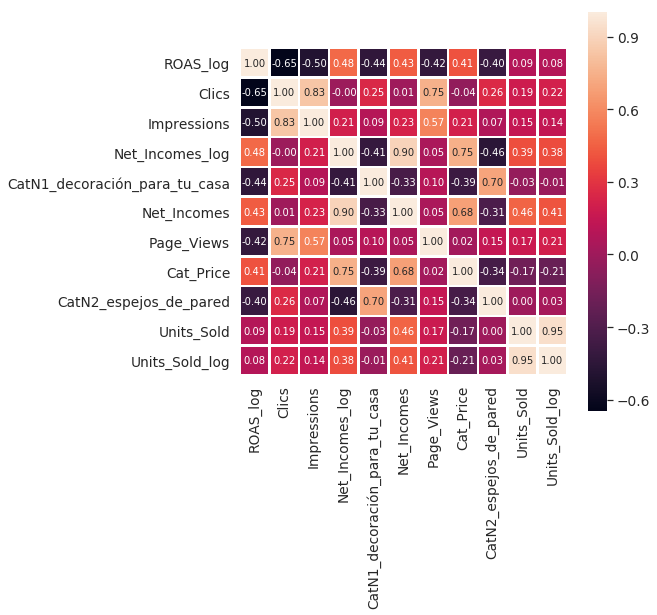

In [97]:
nr_feats=len(df_final.columns)
plot_corr_matrix(df_final, nr_feats, "ROAS_log")

#### Multicollinearity

In [ ]:
cols = corr_abs.nlargest(nr_all_cols, target)[target].index
cols = list(cols)

if drop_similar == 1 :
    for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'] :
        if col in cols: 
            cols.remove(col)

------------------

We should find a function to remove columns correctly

-----------------

In [98]:
df_final.drop(['Impressions'], axis=1, inplace=True)

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [100]:
#df_final.drop(['CPC_medio1w'], axis=1, inplace=True)
df_final.drop(['Units_Sold'], axis=1, inplace=True)

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [101]:
df_final.head(5)

,Page_Views,Net_Incomes_log,Net_Incomes,Clics,Cat_Price,CatN2_espejos_de_pared,CatN1_decoración_para_tu_casa,Units_Sold_log,ROAS_log
20,9.0,3.796612,44.55,5.0,60.0,0,0,0.000000,3.021885
42,9.0,3.796612,44.55,5.0,60.0,0,0,0.000000,2.725029
53,47.0,3.690877,40.08,23.0,50.0,0,0,0.000000,1.254636
65,9.0,4.895150,133.64,2.0,60.0,0,0,1.098612,4.364521
70,37.0,3.796612,44.55,3.0,60.0,0,0,0.000000,3.271884


### StandardScaler

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
sc = StandardScaler()
df_final_sc = sc.fit_transform(df_final)

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [104]:
df_final_sc = pd.DataFrame(df_final_sc)
df_final_sc.head(5)

,0,1,2,3,4,5,6,7,8
0,-0.826173,-0.308946,-0.486379,-0.723215,-0.308497,-0.436194,-0.62177,-0.646000,0.129790
1,-0.826173,-0.308946,-0.486379,-0.723215,-0.308497,-0.436194,-0.62177,-0.646000,-0.071612
2,0.137298,-0.438285,-0.546651,-0.113215,-0.451905,-0.436194,-0.62177,-0.646000,-1.069198
3,-0.826173,1.034834,0.714885,-0.824882,-0.308497,-0.436194,-0.62177,1.598845,1.040699
4,-0.116247,-0.308946,-0.486379,-0.790993,-0.308497,-0.436194,-0.62177,-0.646000,0.299401


In [105]:
df_final_sc.columns

RangeIndex(start=0, stop=9, step=1)

In [107]:
df_final_sc.columns = ['Page_Views', 'Net_Incomes_log', 'Net_Incomes', 'Clics', 'Cat_Price', 'CatN2_espejos_de_pared', 'CatN1_decoración_para_tu_casa', 'Units_Sold_log', 'ROAS_log']

In [108]:
df_final_sc.head(5)

,Page_Views,Net_Incomes_log,Net_Incomes,Clics,Cat_Price,CatN2_espejos_de_pared,CatN1_decoración_para_tu_casa,Units_Sold_log,ROAS_log
0,-0.826173,-0.308946,-0.486379,-0.723215,-0.308497,-0.436194,-0.62177,-0.646000,0.129790
1,-0.826173,-0.308946,-0.486379,-0.723215,-0.308497,-0.436194,-0.62177,-0.646000,-0.071612
2,0.137298,-0.438285,-0.546651,-0.113215,-0.451905,-0.436194,-0.62177,-0.646000,-1.069198
3,-0.826173,1.034834,0.714885,-0.824882,-0.308497,-0.436194,-0.62177,1.598845,1.040699
4,-0.116247,-0.308946,-0.486379,-0.790993,-0.308497,-0.436194,-0.62177,-0.646000,0.299401


### Algorithm

# HAY QUE HACER LOS CALCULOS DE LOS ALGORTIMOS TAMBIEN SIN ESCALAR

In [109]:
df_final_sc.columns

Index(['Page_Views', 'Net_Incomes_log', 'Net_Incomes', 'Clics', 'Cat_Price',
       'CatN2_espejos_de_pared', 'CatN1_decoración_para_tu_casa',
       'Units_Sold_log', 'ROAS_log'],
      dtype='object')

In [110]:
X = df_final_sc[['Page_Views', 'Net_Incomes_log', 'Net_Incomes', 'Clics', 'Cat_Price',
       'CatN2_espejos_de_pared', 'CatN1_decoración_para_tu_casa', 'Units_Sold_log']]

In [111]:
y = df_final_sc["ROAS_log"]

We test the following Regressors from scikit-learn:
    - LinearRegression
    - KNN Regressor
    - Ridge
    - Lasso
    - Elastic Net
    - Gradient Boosting Descent
    - Decision Tree Regressor
    - Random Forest Regressor
    - SVR

In [112]:
from sklearn.model_selection import GridSearchCV, cross_validate

In [113]:
score_calc = 'neg_mean_squared_error'
scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error', 'rsquared':'r2'}

### KNN

In [114]:
from sklearn.neighbors import KNeighborsRegressor

In [123]:
import math

In [115]:
reg_knn_gs = GridSearchCV(KNeighborsRegressor(),
                  param_grid={"n_neighbors":np.arange(4,100)},
                  cv=5,
                  scoring=score_calc)

In [116]:
reg_knn_gs.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 4,  5, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [117]:
knn_best_params = reg_knn_gs.best_params_.get('n_neighbors')

In [118]:
knn_best_params

6

In [119]:
reg_knn = KNeighborsRegressor(n_neighbors= knn_best_params)

In [120]:
scores = cross_validate(reg_knn, X, y, cv=5, scoring=scoring, return_train_score=True)

In [121]:
knn_mae = abs(scores['test_abs_error'].mean())

In [124]:
knn_rmse = math.sqrt(abs(scores['test_squared_error'].mean()))

In [125]:
knn_r2 = abs(scores['test_rsquared'].mean())

### Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
linreg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(linreg, parameters, cv=5, verbose=1 , scoring = score_calc)
grid_linear.fit(X, y)

sc_linear = get_best_score(grid_linear)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6556382207916831
{'copy_X': True, 'fit_intercept': False, 'normalize': True}
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


In [128]:
mlr_best_params = grid_linear.best_params_
mlr_best_params

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [129]:
reg_mlr = LinearRegression(mlr_best_params)

In [130]:
scores_mlr = cross_validate(reg_mlr, X, y, cv=5, scoring=scoring, return_train_score=True)

In [131]:
mlr_mae = abs(scores_mlr['test_abs_error'].mean())

In [132]:
mlr_rmse = math.sqrt(abs(scores_mlr['test_squared_error'].mean()))

In [133]:
mlr_r2 = abs(scores_mlr['test_rsquared'].mean())

### Decision Tree Regressor

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
reg_dtr = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"max_depth":np.arange(2,8),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring="neg_mean_absolute_error")

In [136]:
reg_dtr.fit(X,y)

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]), 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [137]:
dtr_best_params = reg_dtr.best_params_
dtr_best_params

{'max_depth': 7, 'min_samples_leaf': 10}

In [138]:
reg_dtr = DecisionTreeRegressor(max_depth= 7, min_samples_leaf= 10)

In [139]:
scores_dtr = cross_validate(reg_dtr, X, y, cv=5, scoring=scoring, return_train_score=True)

In [140]:
dtr_mae = abs(scores_dtr['test_abs_error'].mean())

In [141]:
dtr_rmse = math.sqrt(abs(scores_dtr['test_squared_error'].mean()))

In [142]:
dtr_r2 = abs(scores_dtr['test_rsquared'].mean())

### Gradient Boosting Regressor

In [143]:
from sklearn.ensemble import GradientBoostingRegressor

In [144]:
reg_gbr = GridSearchCV(GradientBoostingRegressor(n_estimators=20),
                  param_grid={"max_depth":np.arange(2,10),
                             "learning_rate":np.arange(1,10)/10},
                  scoring="neg_mean_absolute_error",
                  cv=5)

In [145]:
reg_gbr.fit(X,y)

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [146]:
reg_gbr.best_params_

{'learning_rate': 0.4, 'max_depth': 2}

In [147]:
gbr_best_params = GradientBoostingRegressor(max_depth=8, n_estimators=20,learning_rate=0.3)

In [148]:
scores_gbr = cross_validate(gbr_best_params, X, y, cv=5, scoring=scoring, return_train_score=True)

In [149]:
gbr_mae = abs(scores_gbr['test_abs_error'].mean())

In [150]:
gbr_rmse = math.sqrt(abs(scores_gbr['test_squared_error'].mean()))

In [151]:
gbr_r2 = abs(scores_gbr['test_rsquared'].mean())

### Ridge

In [152]:
from sklearn.linear_model import Ridge

In [158]:
ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv=5, verbose=1, scoring = score_calc)
grid_ridge.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.005, 0.01, 0.1, 0.5, 1], 'normalize': [True, False], 'tol': [1e-06, 5e-06, 1e-05, 5e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [159]:
ridge_params = grid_ridge.best_params_

In [160]:
ridge_best_params = Ridge(alpha= 0.1, normalize= True, tol= 1e-06)

In [161]:
scores_ridge = cross_validate(ridge_best_params, X, y, cv=5, scoring=scoring, return_train_score=True)

In [162]:
ridge_mae = abs(scores_ridge['test_abs_error'].mean())

In [163]:
ridge_rmse = math.sqrt(abs(scores_ridge['test_squared_error'].mean()))

In [164]:
ridge_r2 = abs(scores_ridge['test_rsquared'].mean())

### Lasso

In [165]:
from sklearn.linear_model import Lasso

In [166]:
lasso = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso, parameters, cv=5, verbose=1, scoring = score_calc)
grid_lasso.fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    3.4s finished
/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 0.8, 1], 'normalize': [True, False], 'tol': [1e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [167]:
grid_lasso.best_params_

{'alpha': 0.1, 'normalize': False, 'tol': 0.001}

In [168]:
reg_lasso = Lasso(alpha= 0.001, normalize= True, tol= 0.0005)

In [169]:
scores_lasso = cross_validate(reg_lasso, X, y, cv=5, scoring=scoring, return_train_score=True)

In [170]:
lasso_mae = abs(scores_lasso['test_abs_error'].mean())

In [171]:
lasso_rmse = math.sqrt(abs(scores_lasso['test_squared_error'].mean()))

In [172]:
lasso_r2 = abs(scores_lasso['test_rsquared'].mean())

### Elastic Net

In [173]:
from sklearn.linear_model import ElasticNet

In [174]:
enet = ElasticNet()
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}
grid_enet = GridSearchCV(enet, parameters, cv=5, verbose=1, scoring = score_calc)
grid_enet.fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    3.3s finished
/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 1.0, 10], 'max_iter': [1000000], 'l1_ratio': [0.04, 0.05], 'fit_intercept': [False, True], 'normalize': [True, False], 'tol': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [175]:
grid_enet.best_params_

{'alpha': 0.1,
 'fit_intercept': False,
 'l1_ratio': 0.05,
 'max_iter': 1000000,
 'normalize': True,
 'tol': 0.0001}

In [176]:
enet_best_params = ElasticNet(alpha= 0.1, fit_intercept= False, l1_ratio= 0.05, max_iter= 1000000, normalize= True, tol= 0.01)

In [177]:
scores_enet = cross_validate(enet_best_params, X, y, cv=5, scoring=scoring, return_train_score=True)

In [178]:
enet_mae = abs(scores_enet['test_abs_error'].mean())

In [179]:
enet_rmse = math.sqrt(abs(scores_enet['test_squared_error'].mean()))

In [180]:
enet_r2 = abs(scores_enet['test_rsquared'].mean())

### SGDRegressor

In [181]:
from sklearn.linear_model import SGDRegressor

In [182]:
sgd = SGDRegressor()
parameters = {'max_iter' :[1000], 'alpha':[1e-05], 'epsilon':[1e-02], 'fit_intercept' : [True]  }
grid_sgd = GridSearchCV(sgd, parameters, cv=5, verbose=1, scoring = score_calc)
grid_sgd.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/miguel/my_project

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_iter': [1000], 'alpha': [1e-05], 'epsilon': [0.01], 'fit_intercept': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [183]:
grid_sgd.best_params_

{'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'max_iter': 1000}

In [184]:
sgd = SGDRegressor(alpha= 1e-05, epsilon= 0.01, fit_intercept= True, max_iter= 1000)

In [185]:
scores_sgd = cross_validate(sgd, X, y, cv=5, scoring=scoring, return_train_score=True)

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/linear_model/stochasti

In [186]:
sgd_mae = abs(scores_sgd['test_abs_error'].mean())

In [187]:
sgd_rmse = math.sqrt(abs(scores_sgd['test_squared_error'].mean()))

In [188]:
sgd_r2 = abs(scores_sgd['test_rsquared'].mean())

### Random Forest Regressor

In [189]:
from sklearn.ensemble import RandomForestRegressor

In [190]:
param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [20,50], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, refit=True, verbose=1, scoring = score_calc)
grid_rf.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    5.8s finished
/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [3, 4, 6, 10], 'n_estimators': [20, 50], 'random_state': [5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [191]:
grid_rf.best_params_

{'min_samples_split': 10, 'n_estimators': 50, 'random_state': 5}

In [192]:
rfr_best_params = RandomForestRegressor(min_samples_split= 3, n_estimators= 50, random_state= 5)

In [193]:
scores_rfr = cross_validate(rfr_best_params, X, y, cv=5, scoring=scoring, return_train_score=True)

In [194]:
rfr_mae = abs(scores_rfr['test_abs_error'].mean())

In [195]:
rfr_rmse = math.sqrt(abs(scores_rfr['test_squared_error'].mean()))

In [196]:
rfr_r2 = abs(scores_rfr['test_rsquared'].mean())

### SVR

In [197]:
from sklearn.svm import SVR

In [557]:
param_grid = {'C': [1000], 'gamma': [0.1, 0.06, 0.02, 0.005], 'kernel': ['rbf']}

grid_svr = GridSearchCV(SVR(), param_grid, cv=5, refit=True, verbose=1, scoring = score_calc)
grid_svr.fit(X, y)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
grid_svr.best_params_

In [ ]:
SVR_best_params = SVR()

In [ ]:
scores_svr = cross_validate(SVR_best_params, X, y, cv=5, scoring=scoring, return_train_score=True)

In [ ]:
abs(scores_svr['test_abs_error'].mean())

In [ ]:
math.sqrt(abs(scores_svr['test_squared_error'].mean()))

In [ ]:
abs(scores_svr['test_rsquared'].mean())

# Comparison plot

In [198]:
list_mae = [knn_mae, mlr_mae, dtr_mae, gbr_mae,lasso_mae, ridge_mae, enet_mae,sgd_mae,rfr_mae]

In [199]:
list_rmse = [knn_rmse, mlr_rmse, dtr_rmse, gbr_rmse,lasso_rmse, ridge_rmse, enet_rmse,sgd_rmse,rfr_rmse]

In [200]:
list_r2 = [knn_r2, mlr_r2, dtr_r2, gbr_r2,lasso_r2, ridge_r2, enet_r2,sgd_r2,rfr_r2]

In [201]:
list_regressors = ['KNN','Linear','DecisionTree', 'GradientBoosting','Lasso','Ridge','ElaNet','SGD','RandomForest']

In [202]:
list_mae

[0.44461032271613715,
 0.5109832791351883,
 0.3432385090598641,
 0.32787634907682117,
 0.4980495753416669,
 0.5016121586389649,
 0.4852960605084336,
 0.5107810639202625,
 0.3130269885933701]

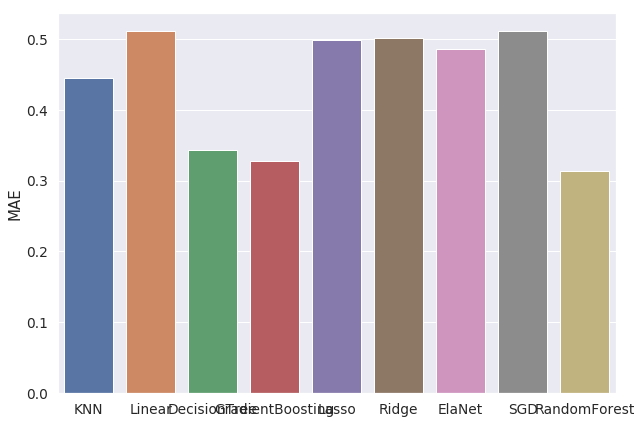

In [203]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_mae, ax=ax)
plt.ylabel('MAE')
plt.show()

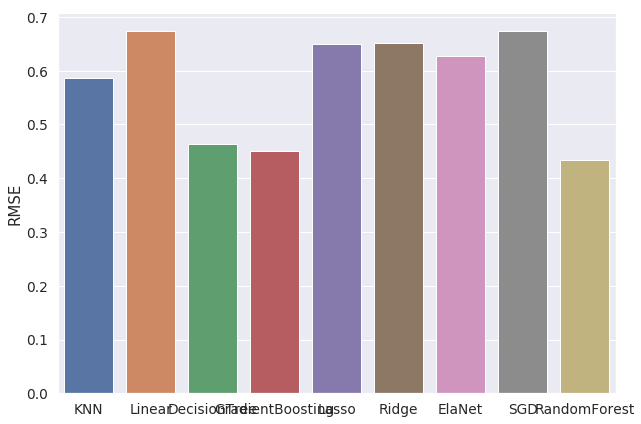

In [204]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_rmse, ax=ax)
plt.ylabel('RMSE')
plt.show()

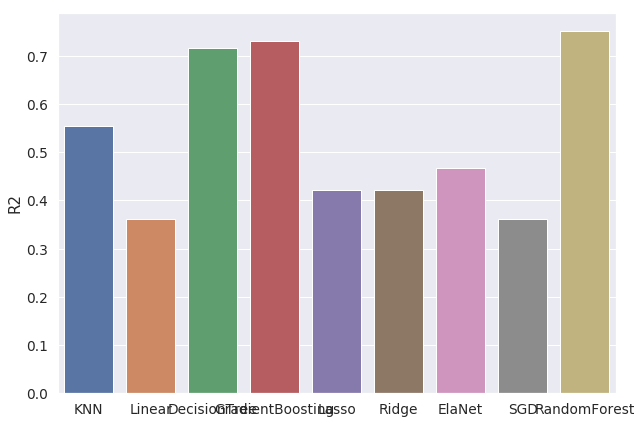

In [205]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_r2, ax=ax)
plt.ylabel('R2')
plt.show()

In [206]:
rfr_best_params.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

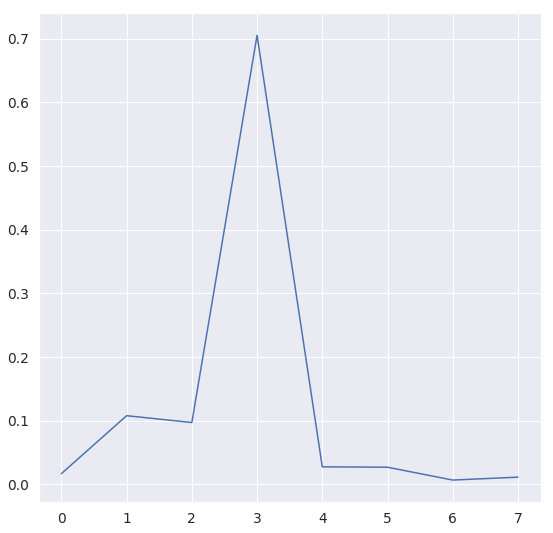

In [207]:
plt.plot(rfr_best_params.feature_importances_)

In [212]:
X.columns[rfr_best_params.feature_importances_>0.09]

array(['Net_Incomes_log', 'Net_Incomes', 'Clics'], dtype=object)

In [ ]:
# feature importance de categorias
# lo mismo con rolling y sin rolloing